In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

In [3]:
# Definindo o Data frame e verificando cabeçalho:

df = pd.read_csv("Video_Games_Sales_as_at_22_Dec_2016.csv")

df.head(5)

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8.0,322.0,Nintendo,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8.0,192.0,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
columns_to_remove = ['Publisher', 'Critic_Score', 'Critic_Count', 'User_Score', 'User_Count', 'Developer', 'Rating']
df = df.drop(columns=columns_to_remove, axis=1)

In [5]:
# Renomeando as colunas:

df.rename(columns={
    'Name':'nome',
    'Platform': 'plataforma',
    'Year_of_Release': 'ano_do_release',
    'Genre': 'genero',
}, inplace=True)

df.head()

,nome,plataforma,ano_do_release,genero,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,82.53
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,40.24
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,35.52
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,32.77
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,31.37


In [14]:
df['Global_Sales'] = pd.to_numeric(df['Global_Sales'], errors='coerce')

In [18]:
# Definir as classes com base nas vendas globais
df['classe_vendas'] = pd.cut(df['Global_Sales'], bins=[0, 1, float('inf')], labels=['baixas', 'altas'])

# Separar as variáveis independentes (recursos) e a variável dependente (classe de vendas)
X = df[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']]
y = df['classe_vendas']

# Dividir os dados em conjuntos de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Criar e treinar o modelo Naive Bayes
modelo = GaussianNB()
modelo.fit(X_train, y_train)

# Fazer previsões com os dados de teste
y_pred = modelo.predict(X_test)

# Avaliar a precisão do modelo
acuracia = (y_pred == y_test).mean()
print('Acurácia:', acuracia)

Acurácia: 0.9697966507177034


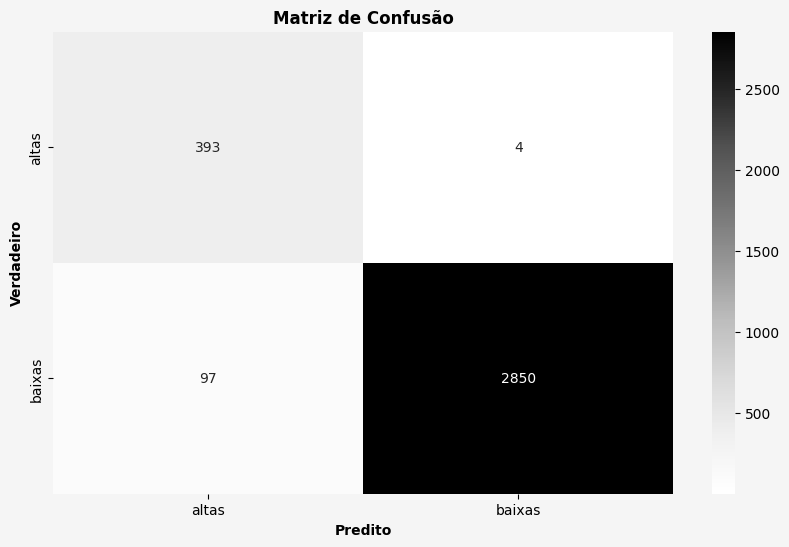

In [41]:
# Calculando a matriz de confusão
cm = confusion_matrix(y_test, y_pred)

# Definindo as labels das classes
labels = np.unique(y_test)

# Plotando o mapa de calor da matriz de confusão
plt.figure(figsize=(10, 6), facecolor='whitesmoke')
sns.heatmap(cm, annot=True, fmt='d', cmap='Greys', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predito', fontweight='bold')
plt.ylabel('Verdadeiro', fontweight='bold')
plt.title('Matriz de Confusão', fontweight='bold')
plt.show()